# STEP 1: WEB SCRAPING

Extracting British airways customer reviews from skytraxx using the BeautifulSoup Library.

In [1]:
#import relevant libraries
import csv
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np

In [2]:
#User name
#User country
#reveiw date
#review type(e.g verified rating)
#number of stars
#review cotent

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 35
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

The loops above collected 3500 reviews by iterating through the paginated pages on the website.

In [4]:
#create  a dataframe 
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Having experienced delays a...
1,✅ Trip Verified | Travelled to Heathrow to Kal...
2,Not Verified | This flight failed at every le...
3,Not Verified | Beware of British Airways and ...
4,✅ Trip Verified | I flew from Cairo to Heathr...


In [5]:
#Formating the review into columns 
df.reviews.get(0)

'✅ Trip Verified |  Having experienced delays and cancellations departing from USA to Europe and now a 3.5 hour estimated delay at LHR heading back to USA, I would warn travelers that BA has become unreliable and is now on my “Do Not Fly” list until they get better organized. '

## Export the data into a csv format

In [6]:
#Saving data into a csv
df.to_csv("BA_reviews.csv")

# STEP 2: CLEANING THE DATA

In [7]:
#Import relevant libraries
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [8]:
#create a dataframe from csv file

cwd = os.getcwd()

df = pd.read_csv(cwd+"/BA_reviews.csv", index_col=0)

In [9]:
df.head()

,reviews
0,✅ Trip Verified | Having experienced delays a...
1,✅ Trip Verified | Travelled to Heathrow to Kal...
2,Not Verified | This flight failed at every le...
3,Not Verified | Beware of British Airways and ...
4,✅ Trip Verified | I flew from Cairo to Heathr...


In [10]:
df.reviews.get(0)

'✅ Trip Verified |  Having experienced delays and cancellations departing from USA to Europe and now a 3.5 hour estimated delay at LHR heading back to USA, I would warn travelers that BA has become unreliable and is now on my “Do Not Fly” list until they get better organized. '

## Cleaning Reviews

We will extract the column of reviews into a separate dataframe and clean it for semantic analysis

In [11]:
#for lemmatization of words we will use nltk library
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
lemma = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cynth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\cynth\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
reviews_data = df.reviews.str.strip("✅ Trip Verified |")

#create an empty list to collect cleaned data corpus
corpus =[]

#loop through each review, remove punctuations, small case it, join it and add it to corpus
for rev in reviews_data:
    rev = re.sub('[^a-zA-Z]',' ', rev)
    rev = rev.lower()
    rev = rev.split()
    rev = [lemma.lemmatize(word) for word in rev if word not in set(stopwords.words("english"))]
    rev = " ".join(rev)
    corpus.append(rev)

In [13]:
# add the corpus to the original dataframe

df['corpus'] = corpus

In [14]:
#Removing unwanted text(first text preprocessing)
df.replace(re.compile(r'\s*✅ Trip Verified \|\s*'), '', inplace=True)

In [15]:
df.head()

,reviews,corpus
0,Having experienced delays and cancellations de...,experienced delay cancellation departing usa e...
1,Travelled to Heathrow to Kalamata and return j...,avelled heathrow kalamata return journey day l...
2,Not Verified | This flight failed at every le...,verified flight failed every level delayed arr...
3,Not Verified | Beware of British Airways and ...,verified beware british airway marketing make ...
4,I flew from Cairo to Heathrow on what they cal...,flew cairo heathrow call euro club class cramp...


Now our data is all cleaned and ready for data visualization and data analysis.

In [16]:
# export the cleaned data

df.to_csv(cwd + "/cleaned-BA-reviews.csv")

# STEP 3: EDA AND SENTIMENT ANALYSIS

Modelling, sentiment analysis or wordclouds to provide some insight into the content of the reviews

In [17]:
#import relevant libraries
nltk.download('vader_lexicon')
from nltk.sentiment import vader
from collections import Counter

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\cynth\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [18]:
!pip install wordcloud 
from wordcloud import WordCloud

In [19]:
!pip install plotly
import plotly.express as px

In [20]:
#create a dataframe from csv file

cwd = os.getcwd()

df = pd.read_csv(cwd+"/cleaned-BA-reviews.csv", index_col=0)

In [21]:
df.head()

,reviews,corpus
0,Having experienced delays and cancellations de...,experienced delay cancellation departing usa e...
1,Travelled to Heathrow to Kalamata and return j...,avelled heathrow kalamata return journey day l...
2,Not Verified | This flight failed at every le...,verified flight failed every level delayed arr...
3,Not Verified | Beware of British Airways and ...,verified beware british airway marketing make ...
4,I flew from Cairo to Heathrow on what they cal...,flew cairo heathrow call euro club class cramp...


In [22]:
# an instance of SentimentIntensityAnalyzer
sentiment_analyzer = vader.SentimentIntensityAnalyzer()

# a new column named 'SENTIMENT'
df['SENTIMENT'] = df['reviews'].apply(
    lambda review: sentiment_analyzer.polarity_scores(review)['compound']
    )
df

,reviews,corpus,SENTIMENT
0,Having experienced delays and cancellations de...,experienced delay cancellation departing usa e...,0.0516
1,Travelled to Heathrow to Kalamata and return j...,avelled heathrow kalamata return journey day l...,0.9032
2,Not Verified | This flight failed at every le...,verified flight failed every level delayed arr...,0.8820
3,Not Verified | Beware of British Airways and ...,verified beware british airway marketing make ...,-0.5519
4,I flew from Cairo to Heathrow on what they cal...,flew cairo heathrow call euro club class cramp...,-0.7644
...,...,...,...
3495,LGW to AMS. Easy check-in at Gatwick with the ...,lgw am easy check gatwick pod check print boar...,0.8100
3496,I really do not have the energy to write very ...,really energy write detail bad recent flight v...,-0.8880
3497,LHR-ATH-ATH June 2014. Both flights 1.5 hours ...,lhr ath ath june flight hour late always seems...,-0.3400
3498,LHR to BKK in club world over night flight. Lo...,lhr bkk club world night flight lounge great n...,0.9796


In [23]:
# Creating another new column called 'SENTIMENT_TYPE' that contains the type of sentiment of each review using nltk
# for each sentiment score in the 'SENTIMENT' column
df['SENTIMENT_TYPE'] = df['SENTIMENT'].apply(
    lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral')
    )
df

,reviews,corpus,SENTIMENT,SENTIMENT_TYPE
0,Having experienced delays and cancellations de...,experienced delay cancellation departing usa e...,0.0516,positive
1,Travelled to Heathrow to Kalamata and return j...,avelled heathrow kalamata return journey day l...,0.9032,positive
2,Not Verified | This flight failed at every le...,verified flight failed every level delayed arr...,0.8820,positive
3,Not Verified | Beware of British Airways and ...,verified beware british airway marketing make ...,-0.5519,negative
4,I flew from Cairo to Heathrow on what they cal...,flew cairo heathrow call euro club class cramp...,-0.7644,negative
...,...,...,...,...
3495,LGW to AMS. Easy check-in at Gatwick with the ...,lgw am easy check gatwick pod check print boar...,0.8100,positive
3496,I really do not have the energy to write very ...,really energy write detail bad recent flight v...,-0.8880,negative
3497,LHR-ATH-ATH June 2014. Both flights 1.5 hours ...,lhr ath ath june flight hour late always seems...,-0.3400,negative
3498,LHR to BKK in club world over night flight. Lo...,lhr bkk club world night flight lounge great n...,0.9796,positive


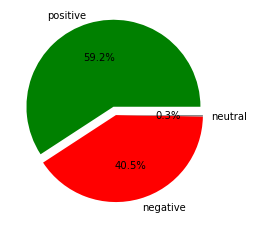

In [24]:
# calculate the percentage of each type of sentiment score
sentiment_type_percentages = df['SENTIMENT_TYPE'].value_counts(normalize=True) * 100

# create the pie chart
fig, ax = plt.subplots()
ax.pie(
    sentiment_type_percentages,
    labels=sentiment_type_percentages.index, 
    colors=['green', 'red', 'grey'], 
    explode=[0.1, 0, 0], 
    autopct='%1.1f%%'
    )

plt.show()

Sentiment
Out of 3500 reviews, 2075 were positive, 1415 were negative and 10 were neutral. This means the majority of reviews were polarised as either positive or negative

In [25]:
#Saving the new data into a csv
df.to_csv("Review_Sentiment_Analysis.csv")

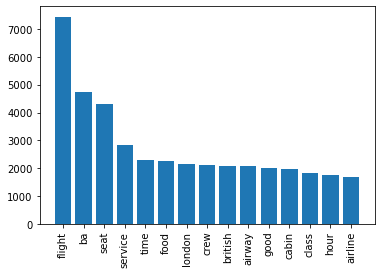

In [26]:
# The frequency chart shows the key topics 

# Get the reviews from the dataframe
reviews = df['corpus']

# Convert the reviews to a list of words
words = []
for review in reviews:
    words.extend(review.split())

# Filter out the stubborn stop words that don't want to disappear
stopwords = nltk.corpus.stopwords.words('english')
key_words = [word for word in words if word not in stopwords and word not in ['I', 'The','would','one','get','-']]

# Get the top 20 most used key words
word_counts = Counter(key_words)
top_15_words = word_counts.most_common(15)

# Filter out the stop words 
filtered_words = [
    (word, count) for word, count in top_15_words if word not in stopwords and word not in ['I', 'The','would','one','get','-']
    ]

# Get the labels and values for the histogram
labels, values = zip(*top_15_words)

# Create the histogram
plt.bar(labels, values)

# Set the x-axis labels to be vertical
plt.xticks(rotation=90)

#Display the plot
plt.show()

## Key topics
The frequency chart above shows that the key topics within the reviews include “flight”, “seat” and “service” , showing that people are actively talking about the timing of the flights, the comfortability of the seats and the customer service they received.

## Generating a word cloud

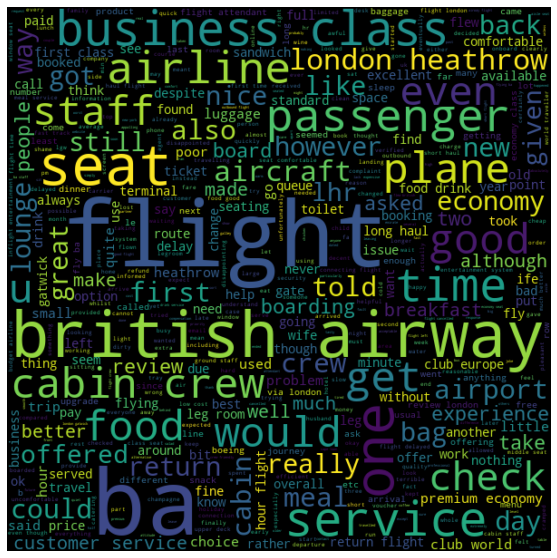

In [27]:
import nltk
from nltk.corpus import stopwords
# Start with one review:
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))

# Create and generate a word cloud image:
wordcloud = WordCloud(height=600,width=600,max_font_size=100, max_words=500, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The wordcloud also shows keywords such as 'staff', 'seat', 'flight' ,'time' ,'cabin crew' and service. This shows that people are actively talking about their experience with the flight and the customer service of support.